In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout

In [3]:
data = pd.read_csv("Reviews.csv")
df= pd.DataFrame(data)

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
#adding a new column as "Sentiment" that will be our output feature(label)

df["Sentiment"]=df['Score'].apply(lambda x:"Positive" if (x>3) else "Negative")

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive


In [7]:
#Adding a column of helpfulnes that will give us an insight which review was helpful
df["Helpfulness"]=np.where(df['HelpfulnessDenominator']>0,data['HelpfulnessNumerator']/data['HelpfulnessDenominator'],-1)

In [8]:
def func(x):
    if x < 0:
        return "Not Even Voted"
    elif x >=0 and x< 0.25:
        return "0-25% hepful"
    elif x >= 0.25 and x< 0.75:
        return "25-75% helpful"
    else:
        return '75-100% useful'
    

df['Helpfulness']=df['Helpfulness'].apply(func)

In [9]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Helpfulness
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,75-100% useful
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,Not Even Voted
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,75-100% useful
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,75-100% useful
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,Not Even Voted


In [10]:
Rating_count=df['Score'].value_counts()
print Rating_count

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64


In [11]:
def percentage(x):
    
    return (float(x)/(Rating_count.sum()))*100
rating_count_perentage=Rating_count.apply(percentage)


In [12]:
print rating_count_perentage

5    63.878871
4    14.188483
1     9.194763
3     7.501047
2     5.236835
Name: Score, dtype: float64


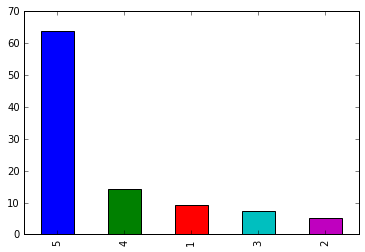

In [13]:
rating_count_perentage.plot('bar')

In [14]:
helpfulness_count=df["Helpfulness"].value_counts()
helpfulness_count

Not Even Voted    270052
75-100% useful    209200
25-75% helpful     50922
0-25% hepful       38280
Name: Helpfulness, dtype: int64

In [15]:
def percentage1(x):
    
    return (float(x)/(helpfulness_count.sum()))*100
helpfulness_count_perentage=helpfulness_count.apply(percentage1)

In [16]:
helpfulness_count_perentage

Not Even Voted    47.506395
75-100% useful    36.801571
25-75% helpful     8.957981
0-25% hepful       6.734054
Name: Helpfulness, dtype: float64

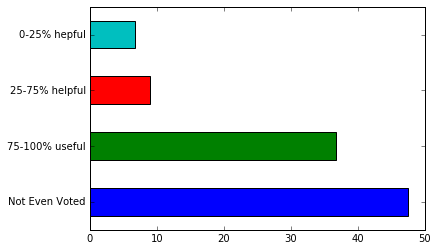

In [17]:
helpfulness_count_perentage.plot('Barh')

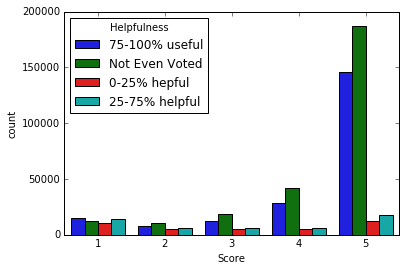

In [18]:
sns.countplot(x="Score",hue='Helpfulness', data=df)

In [250]:
sentiment_count=df["Sentiment"].value_counts()
sentiment_count

Positive    443777
Negative    124677
Name: Sentiment, dtype: int64

In [260]:
def percentage3(x):
    
    return (float(x)/(sentiment_count.sum()))*100

sentiment_count_percentage=sentiment_count.apply(percentage3)

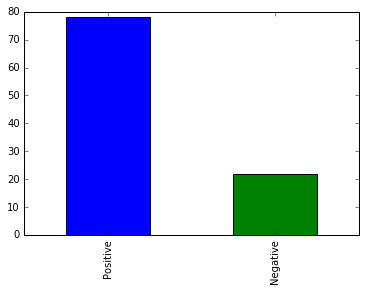

In [263]:
sentiment_count_percentage.plot('bar')

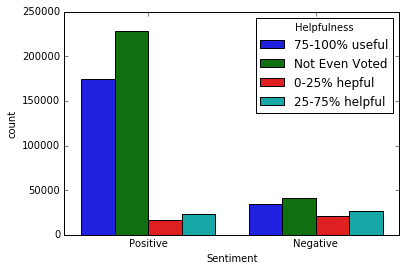

In [19]:
sns.countplot(x="Sentiment",hue='Helpfulness', data=df)

In [20]:
#counting the total number of words in a review
def count_word(x):
    return len(x.split())

df['Length_of_review']= df['Text'].apply(count_word)

In [21]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Helpfulness,Length_of_review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,75-100% useful,48
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,Not Even Voted,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,75-100% useful,94
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,75-100% useful,41
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,Not Even Voted,27


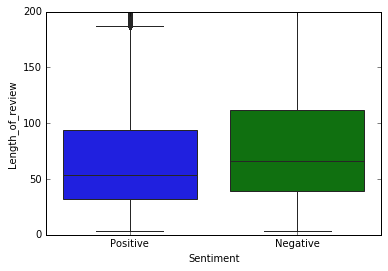

In [22]:
sns.boxplot(x="Sentiment",y="Length_of_review", data=df)
plt.ylim(0, 200)
plt.figure(figsize=(25,9))

In [23]:
df2 = df[df['Sentiment'].isin(['Positive'])]

In [24]:
df3 = df[df['Sentiment'].isin(['Negative'])]

In [25]:
positive_reviews=df2["Text"]

In [26]:
positive_reviews.head()

0    I have bought several of the Vitality canned d...
2    This is a confection that has been around a fe...
4    Great taffy at a great price.  There was a wid...
5    I got a wild hair for taffy and ordered this f...
6    This saltwater taffy had great flavors and was...
Name: Text, dtype: object

In [27]:
negative_reviews=df3["Text"]

In [28]:
negative_reviews.head()

1     Product arrived labeled as Jumbo Salted Peanut...
3     If you are looking for the secret ingredient i...
12    My cats have been happily eating Felidae Plati...
16    I love eating them and they are good for watch...
26    The candy is just red , No flavor . Just  plan...
Name: Text, dtype: object

In [29]:
positive_reviews_sample=positive_reviews[:900]

In [30]:
negative_reviews_sample=negative_reviews[:900]

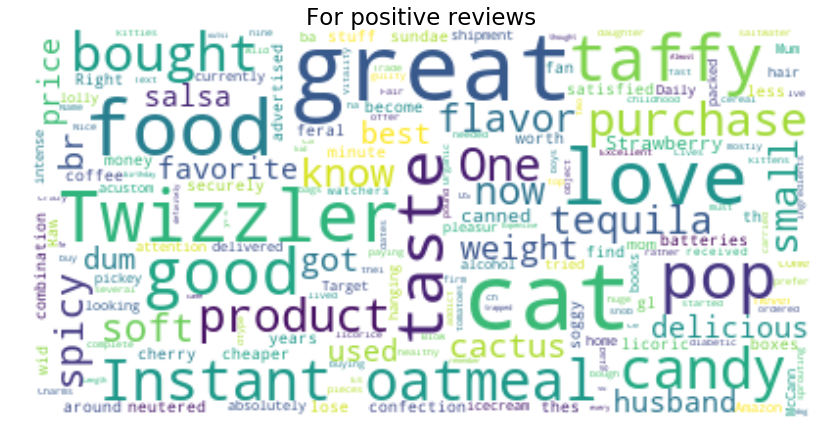

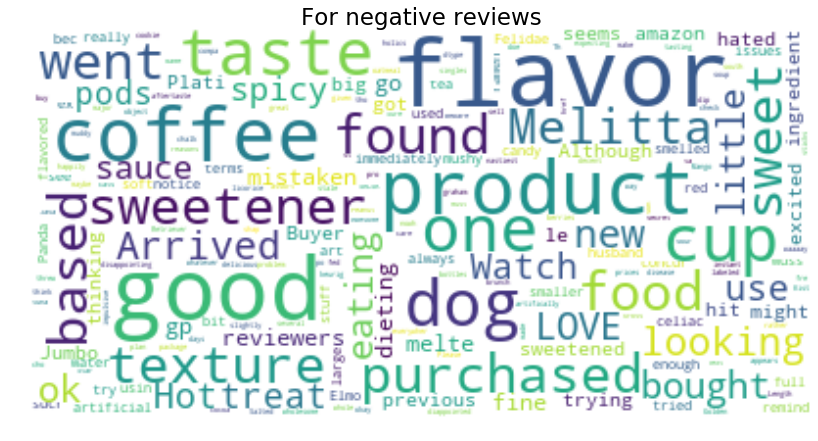

In [31]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud1 = WordCloud(background_color='white', stopwords=stopwords, max_words=200, max_font_size=48,
                      random_state=42).generate(str(positive_reviews_sample))

wordcloud2 = WordCloud(background_color='white', stopwords=stopwords, max_words=200, max_font_size=48,
                      random_state=42).generate(str(negative_reviews_sample))
print(wordcloud1)
plt.figure(figsize=(15,7))
plt.title('For positive reviews',{'fontsize': 23})
plt.imshow(wordcloud1)
plt.axis('off')

plt.show()


print(wordcloud2)

plt.figure(figsize=(15,7))
plt.title('For negative reviews',{'fontsize': 23})
plt.imshow(wordcloud2)
plt.axis('off')

plt.show()



In [32]:
feature=df['Text']

In [33]:
feature.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [34]:
from nltk.tokenize import word_tokenize

tokenized_feature = [word_tokenize(doc) for doc in feature]


In [35]:
no_punct=[]

for words in tokenized_feature:

    word=[w.lower() for w in words if w.isalpha()]
    no_punct.append(word)

In [36]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')



no_stop_words=[]
for words in no_punct:
    stop_word = [w for w in words if not w in stop_words]
    no_stop_words.append(stop_word)

In [37]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
clean_reviews=[]
for words in no_stop_words:
    stemm = [porter.stem(w) for w in words]
    clean_reviews.append(stemm)

In [38]:
clean_reviews=pd.Series(clean_reviews)

In [39]:
clean_reviews.head()

0    [bought, sever, vital, can, dog, food, product...
1    [product, arriv, label, jumbo, salt, peanut, p...
2    [confect, around, centuri, light, pillowi, cit...
3    [look, secret, ingredi, robitussin, believ, fo...
4    [great, taffi, great, price, wide, assort, yum...
dtype: object

In [40]:
X=clean_reviews
y=df['Score'].apply(lambda x: 1 if (x > 3)  else 0)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(426340L,)
(142114L,)
(426340L,)
(142114L,)


In [42]:
def pass_(arg):
    return arg

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
    
vectorizer = TfidfVectorizer(tokenizer=pass_,preprocessor=pass_,lowercase=False,analyzer='word',token_pattern=None)
X_train_transformed= vectorizer.fit_transform(X_train)
X_test_transformed=vectorizer.transform(X_test)

In [44]:
print X_train_transformed.shape
print X_test_transformed.shape

(426340, 64358)
(142114, 64358)


In [104]:
vocab=vectorizer.get_feature_names()

In [132]:
vocab=pd.Series(vocab)
vocab.head(50)

0                         a
1                        aa
2                       aaa
3                      aaaa
4                     aaaaa
5            aaaaaaaaaaaaaa
6             aaaaaaaaagghh
7                  aaaaaaah
8             aaaaaaahhhhhh
9        aaaaaaarrrrrggghhh
10                  aaaaaah
11                aaaaaahhh
12               aaaaaahhhh
13              aaaaaahhhhh
14       aaaaaahhhhhyaaaaaa
15         aaaaaawwwwwwwwww
16                   aaaaah
17    aaaaahhhhhhhhhhhhhhhh
18                aaaaawsom
19                    aaaah
20               aaaahhhhhh
21          aaaahhhhhhhhhhh
22                 aaaallll
23                   aaaand
24              aaaannnnddd
25              aaaarrrrghh
26                    aaagh
27                     aaah
28                   aaahhh
29                aaahhhhhh
30                   aabout
31                   aachen
32                    aacut
33                     aadd
34                   aadmit
35                  

In [45]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_transformed, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
y_pred=clf.predict(X_test_transformed)



In [47]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print f1_score(y_test,y_pred)
print accuracy_score(y_test,y_pred)

0.897223555443
0.822199079612


In [48]:
from sklearn.linear_model import LogisticRegression
clf1= LogisticRegression()
clf1.fit(X_train_transformed, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
y_pred1=clf1.predict(X_test_transformed)


In [50]:
print f1_score(y_test,y_pred1)
print accuracy_score(y_test,y_pred1)

0.932163819825
0.891432230463


In [89]:
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier()
clf2.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
y_pred2=clf2.predict(X_test_transformed)

In [53]:
print f1_score(y_test,y_pred2)
print accuracy_score(y_test,y_pred2)

0.936170766854
0.896519695456


In [54]:
from sklearn import linear_model
clf3 = linear_model.SGDClassifier()
clf3.fit(X_train_transformed, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [55]:
y_pred3=clf3.predict(X_test_transformed)

In [60]:
print f1_score(y_test,y_pred3)
print accuracy_score(y_test,y_pred3)

0.920983773681
0.86910508465


In [57]:
from sklearn.neural_network import MLPClassifier
clf4 = MLPClassifier()
clf4.fit(X_train_transformed, y_train)





MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [240]:
y_pred4=clf4.predict(X_test_transformed)

In [241]:
print f1_score(y_test,y_pred4)
print accuracy_score(y_test,y_pred4)

0.949790193453
0.921358909045


In [242]:
y_pred_prob=clf4.predict_proba(X_test_transformed)[:,1]

('ROC Rate', 0.95562353888085172)


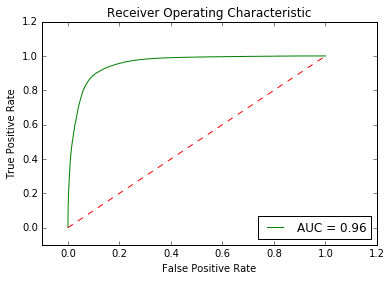

In [243]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC Rate', roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'g',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()